In [2]:
import pandas as pd

In [79]:
data = pd.ExcelFile('data.xlsx').parse('Лист1')
teachers_dataframe = data.copy()
    
teachers_dataframe = teachers_dataframe.replace(
    ['сenter', 'nw', 'south', 'caucasus', 'volga', 'ural', 'siberia', 'dv'],
    [1, 2, 3, 4, 5, 6, 7, 8])

teachers_dataframe.columns = ['district', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']

pd.set_option('display.max_rows', None)
display(teachers_dataframe)

,district,x1,x2,x3,x4,x5,x6
0,Белгородская область,7 777,14 918,2 825,2 009,1 841,1.0
1,Брянская область,4 560,10 211,1 538,1 418,837,NaN
2,Владимирская область,5 802,8 902,1 703,1 468,NaN,1.0
3,Воронежская область,NaN,17 186,3 362,2 458,4 347,1.0
4,Ивановская область,4 495,5 649,1 338,977,1 288,1.0
5,Калужская область,4 335,7 514,1 569,998,689,1.0
6,Костромская область,3 280,5 363,1 191,784,604,1.0
7,Курская область,4 675,13 227,1 876,1 799,1 423,1.0
8,Липецкая область,4 509,9 159,1 796,1 319,721,1.0
9,Московская область,33 195,52 660,8 134,5 313,3 355,1.0


x1 - Педагогические работники дошкольных образовательных организаций  
x2 - Педагогические работники образовательных организаций общего образования  
x3 - Педагогические работники образовательных организаций дополнительного образования детей  
x4 - Педагогические работники образовательных организаций начального и среднего проффесионального образования  
x5 - Педагогические работники образовательных организаций высшего проффесионального образования

In [80]:
teachers_dataframe.info()
teachers_dataframe.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  85 non-null     object 
 1   x1        83 non-null     object 
 2   x2        84 non-null     object 
 3   x3        84 non-null     object 
 4   x4        84 non-null     object 
 5   x5        83 non-null     object 
 6   x6        84 non-null     float64
dtypes: float64(1), object(6)
memory usage: 4.8+ KB


(85, 7)

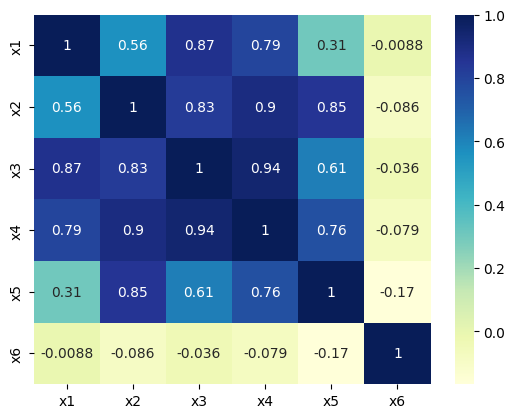

In [81]:
import seaborn as sb
import matplotlib.pyplot as plt

teachers_dataframe = teachers_dataframe.replace('\xa0', '', regex=True)
teachers_dataframe = teachers_dataframe.replace('f', '', regex=True) 
teachers_dataframe = teachers_dataframe.replace('d', '', regex=True) 

correlation = teachers_dataframe[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']].corr()

dataplot = sb.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

Составлю тепловую карту пропущенных значений и вычислю среднее значение каждого признака для дальнейшего сравнения.

[7333.084337349397,
 14787.75,
 2519.4285714285716,
 1804.6785714285713,
 2169.9036144578313]

<Axes: >

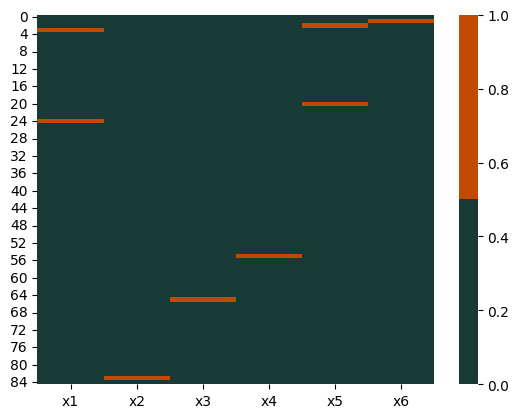

In [82]:
avgs = []
for col in teachers_dataframe.columns[1:-1]:
    avgs.append(teachers_dataframe[col].astype(float, errors='ignore').mean(skipna=True))
display(avgs)

colors = ['#183A37', '#C44900'] 
sb.heatmap(teachers_dataframe.loc[:, ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']].isnull(), cmap=sb.color_palette(colors))

In [83]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=1000, max_iter=100)
train_df = teachers_dataframe.loc[:, ['x1', 'x2', 'x3', 'x4', 'x5']]
train_df.head()

,x1,x2,x3,x4,x5
0,7777,14918,2825,2009,1841
1,4560,10211,1538,1418,837
2,5802,8902,1703,1468,NaN
3,NaN,17186,3362,2458,4347
4,4495,5649,1338,977,1288


In [84]:
imputer.fit(train_df)
imputed_df = imputer.transform(train_df).astype(int)
teachers_dataframe.loc[:, ['x1', 'x2', 'x3', 'x4', 'x5']] = imputed_df
display(teachers_dataframe)



,district,x1,x2,x3,x4,x5,x6
0,Белгородская область,7777,14918,2825,2009,1841,1.0
1,Брянская область,4560,10211,1538,1418,837,NaN
2,Владимирская область,5802,8902,1703,1468,1186,1.0
3,Воронежская область,9698,17186,3362,2458,4347,1.0
4,Ивановская область,4495,5649,1338,977,1288,1.0
5,Калужская область,4335,7514,1569,998,689,1.0
6,Костромская область,3280,5363,1191,784,604,1.0
7,Курская область,4675,13227,1876,1799,1423,1.0
8,Липецкая область,4509,9159,1796,1319,721,1.0
9,Московская область,33195,52660,8134,5313,3355,1.0


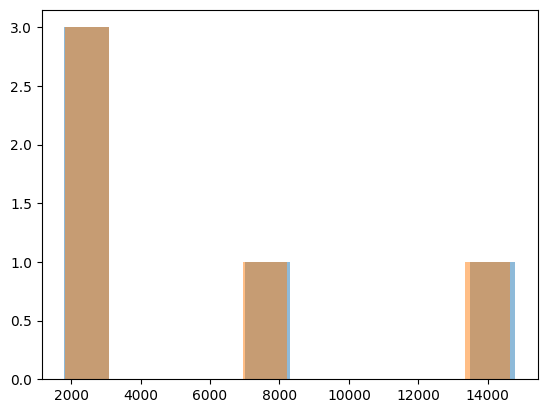

In [85]:
updated_avgs = []
for col in teachers_dataframe.columns[1:-1]:
    updated_avgs.append(teachers_dataframe[col].astype(float, errors='ignore').mean(skipna=True))

plt.hist(avgs, alpha=0.5)
plt.hist(updated_avgs, alpha=0.5)
plt.show()

Видно, что в правом столбце самое сильное отклонение – это второй признак (видно по значениям). Следовательно, в нем есть выбросы. Построим "ящик с усами".

<Axes: xlabel='x2'>

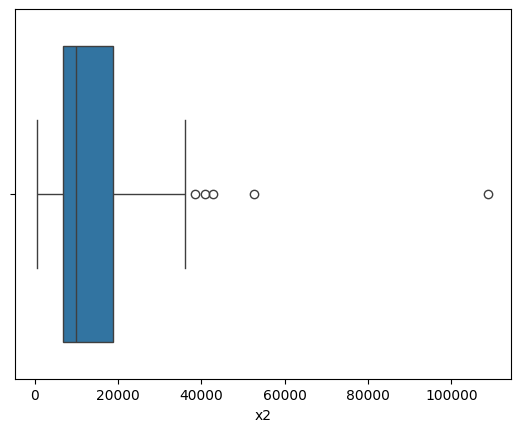

In [86]:
sb.boxplot(x=teachers_dataframe['x2'])

30640
11276


/var/folders/5_/zrzd_k4d2t3g0drn18ndb3680000gn/T/ipykernel_11536/3054552158.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teachers_dataframe['x2'][i] = teachers_dataframe['x2'].mean(skipna=True).astype(int)


<Axes: xlabel='x2'>

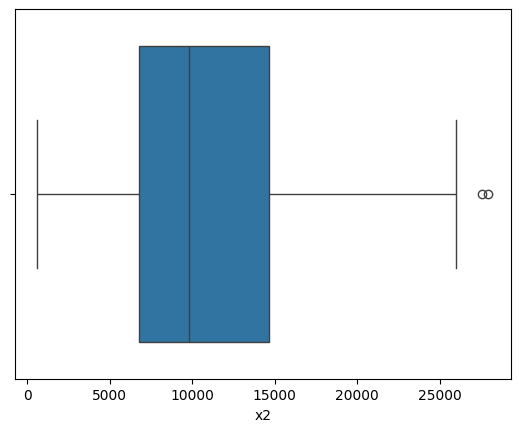

In [104]:

for i in range(len(teachers_dataframe['x2'])):
    if teachers_dataframe['x2'][i] > 30000:
        print(teachers_dataframe['x2'][i])
        teachers_dataframe['x2'][i] = teachers_dataframe['x2'].mean(skipna=True).astype(int)
        print(teachers_dataframe['x2'][i])
        
sb.boxplot(x=teachers_dataframe['x2'])